In [617]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [618]:
%%sh
./run.sh

Experiment date and time: Fri Apr 14 05:52:33 PM PDT 2023


../TemplateB64.nasm:821: error: label `EXITALL1' changed during code generation [-w+error=label-redef-late]


In [619]:
def clean_df(df):
    df = df.fillna(-1)
    df = df.replace(r'[^0-9]+',-1)
    df = df.replace('',-1)
    df = df.replace(' ',-1)
    df = df.replace('\n',-1)
    return df

In [620]:
data = pd.read_csv("results.csv", delim_whitespace=True) 
data = clean_df(data)

data = data.drop([0])

data["Clock"] = pd.to_numeric(data["Clock"],errors='coerce')
data["BrRetired"] = pd.to_numeric(data["BrRetired"],errors='coerce')
data["BrClear"] = pd.to_numeric(data["BrClear"],errors='coerce')
data["Dec-uops"] = pd.to_numeric(data["Dec-uops"],errors='coerce')
data["DSB-uops"] = pd.to_numeric(data["DSB-uops"],errors='coerce')
data["LSD-uops"] = pd.to_numeric(data["LSD-uops"],errors='coerce')

data["Dec-uops"] = (data["Dec-uops"]) / (data["DSB-uops"])
data["LSD-uops"] = (data["LSD-uops"]) / (data["DSB-uops"])
data["DSB-uops"] = (data["DSB-uops"]) / (data["BrRetired"])


data["BrRetired"] = (data["BrRetired"] - 1000) // 1000
data["Clock"] = (data["Clock"]) / (data["BrRetired"]*1000)
data["BrClear"] = data["BrClear"] / 1000

# mode_value = data['BrRetired'].mode()[0]
# data['BrRetired'] = data['BrRetired'].apply(lambda x: mode_value if x != mode_value else x)

In [621]:
data

,Clock,BrRetired,BrClear,Dec-uops,DSB-uops,LSD-uops
1,1.299000,1,0.0,0.0,1.514000,0.011559
2,1.311000,1,0.0,0.0,1.514000,0.093791
3,1.309000,1,0.0,0.0,1.514000,0.068362
4,1.303000,1,0.0,0.0,1.514000,0.042602
5,1.309000,1,0.0,0.0,1.514000,0.052180
...,...,...,...,...,...,...
295,10.638833,6,8.0,0.0,11.863429,0.110267
296,10.639500,6,8.0,0.0,11.861857,0.110281
297,10.638500,6,8.0,0.0,11.863429,0.110267
298,10.632833,6,8.0,0.0,11.863429,0.110267


[(0.0, 3.0)]

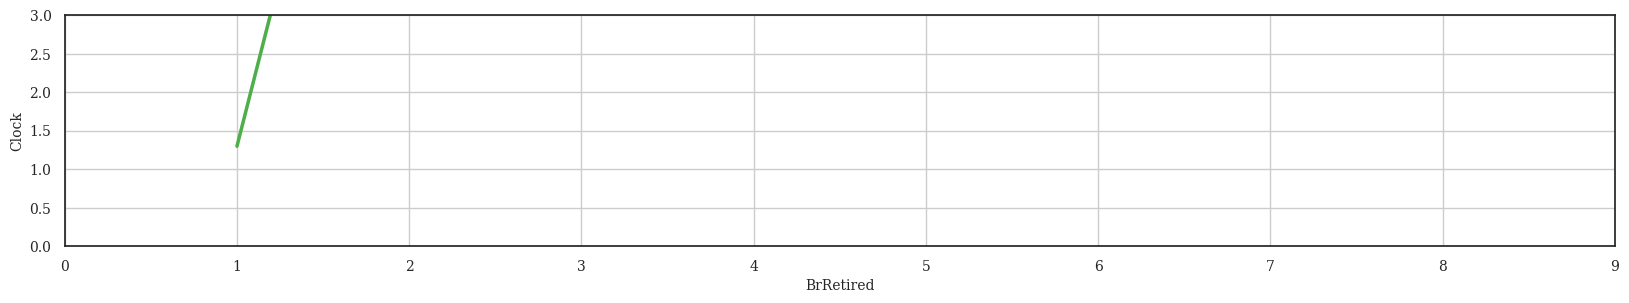

In [622]:

def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(20,3),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

p = sns.lineplot(data=data, x="BrRetired", y="Clock", marker="o", color=sns.color_palette("Set1")[2], linewidth=2.5, markersize = 0)
p.grid()
# p.set_xscale('log', base=2)
p.set(xlim=(0,9))
p.set(ylim=(0,3))

# Saving the Seaborn Figure:
# plt.savefig('res.pdf', bbox_inches='tight')

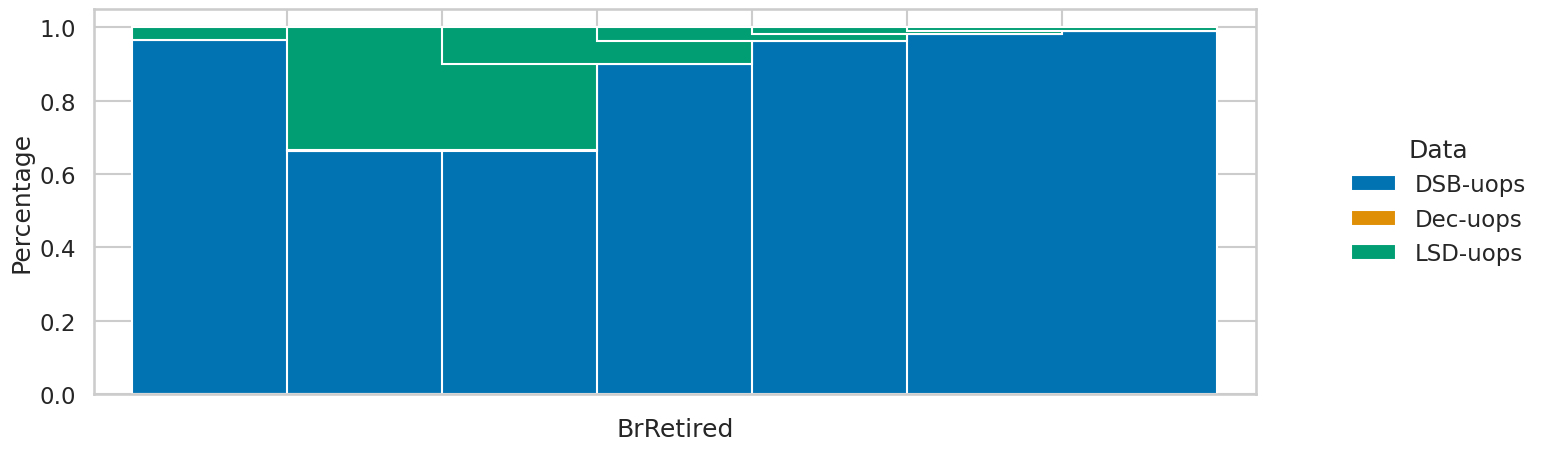

In [623]:
# Select the columns to use for the bar plot
cols = ["LSD-uops", "DSB-uops", "Dec-uops"]

# Group the data by "BrRetired" and calculate the mean for each group
grouped = data.groupby("BrRetired")[cols].mean()

# Calculate the total sum for each row
totals = grouped.sum(axis=1)

# Calculate the percentage of each data point over the total sum for each row
percentages = grouped.div(totals, axis=0)

# Reset the index to make "BrRetired" a column again
percentages = percentages.reset_index()

# Melt the dataframe to create a "long" format for Seaborn
melted = pd.melt(percentages, id_vars="BrRetired", var_name="Data", value_name="Percentage")

# Pivot the melted dataframe to create a "wide" format for Seaborn
pivot = melted.pivot(index="BrRetired", columns="Data", values="Percentage")

# Create the bar plot using Seaborn
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.set_context("talk")
ax = pivot.plot(kind="bar", stacked=True, width=2)

# Set the axis labels and legend
ax.legend(title="Data", loc="center right",bbox_to_anchor=(1.25, 0.5), frameon=False)
ax.set_xlabel("BrRetired")
ax.set_ylabel("Percentage")
# ax.set(xlim=(0,512))

# Remove the x-tick labels
ax.set_xticklabels([])
    
# Show the plot
plt.show()

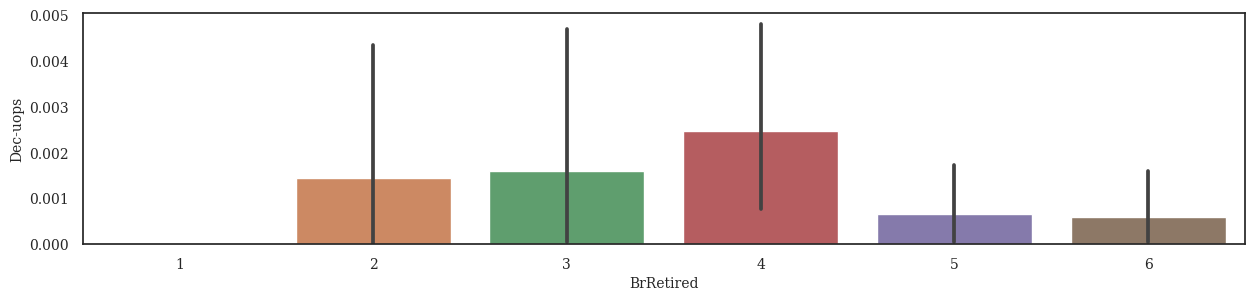

In [624]:
def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(15,3),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

g = sns.barplot(data=data, x="BrRetired", y="Dec-uops")